## Load the downloaded dataset into Python

In [2]:
# Import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [3]:
# Data from Train folder
train_data_location = os.path.join('..','data', 'cats_and_dogs_filtered', 'train')
train_data = ImageDataGenerator().flow_from_directory(train_data_location)

# Data from Validation folder
validation_data_location = os.path.join('..','data', 'cats_and_dogs_filtered', 'validation')
validation_data = ImageDataGenerator().flow_from_directory(validation_data_location)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
# Check the output mappings
animal_mappings = train_data.class_indices
print(f'The animal mappings are {animal_mappings}')

The animal mappings are {'cats': 0, 'dogs': 1}


## Download the pre-trained model

In [5]:
# Import the necessary package
from tensorflow.keras.applications import ResNet50

In [6]:
# Import the desired pre-trained model
# List of pre-trained models: https://www.tensorflow.org/api_docs/python/tf/keras/applications
pre_trained_model = ResNet50(include_top=False)

In [7]:
# Freeze the model so we don't accidentally change the pre-trained model
pre_trained_model.trainable = False

## Keras Callbacks - Early Stopping
- If you want training to stop when some metric stops improving (eg. validation loss), you can use the Early Stopping callback to do so.
- This helps to stop the training before all your epochs have completed, thus speeding up training process. 
- However, the model reaches could be sub-optimal. Thus is you are not achieving your desired accuracy, please remove Early Stopping and run for more Epochs

In [35]:
# Import the necessary packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
# To create a model for our needs, first create a blank model
model = Sequential()

# Then add the pre-trained model to use Transfer Learning
model.add(pre_trained_model)

# Finally add our custom modifications
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(len(animal_mappings), activation='softmax'))

# Make the model ready for training
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
custom_callbacks = [EarlyStopping(patience=3)]

In [38]:
# Train the model for 15 rounds without Regularization
training_history_es = model.fit(train_data, epochs=15, validation_data=validation_data, callbacks=custom_callbacks)

Epoch 1/15
63/63 [==============================] - 301s 5s/step - loss: 0.8173 - accuracy: 0.9080 - val_loss: 0.0885 - val_accuracy: 0.9780
Epoch 2/15
63/63 [==============================] - 294s 5s/step - loss: 0.2313 - accuracy: 0.9515 - val_loss: 0.0943 - val_accuracy: 0.9740
Epoch 3/15
63/63 [==============================] - 294s 5s/step - loss: 0.1313 - accuracy: 0.9680 - val_loss: 0.0843 - val_accuracy: 0.9790
Epoch 4/15
63/63 [==============================] - 294s 5s/step - loss: 0.0879 - accuracy: 0.9735 - val_loss: 0.5832 - val_accuracy: 0.9060
Epoch 5/15
63/63 [==============================] - 294s 5s/step - loss: 0.0746 - accuracy: 0.9805 - val_loss: 0.1155 - val_accuracy: 0.9800
Epoch 6/15
63/63 [==============================] - 294s 5s/step - loss: 0.0955 - accuracy: 0.9825 - val_loss: 0.1104 - val_accuracy: 0.9790


### Plot the training losses

In [39]:
# Import the necessary package
import matplotlib.pyplot as plt

# Custom function
def plot_training_loss(training_history):
    # Plot the Training and Validation losses over each epoch
    plt.plot(training_history.history['loss'], label='training loss')
    plt.plot(training_history.history['val_loss'], label='validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    
# Custom function
def plot_training_accuracy(training_history):
    # Plot the Training and Validation losses over each epoch
    plt.plot(training_history.history['accuracy'], label='training accuracy')
    plt.plot(training_history.history['val_accuracy'], label='validation accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()

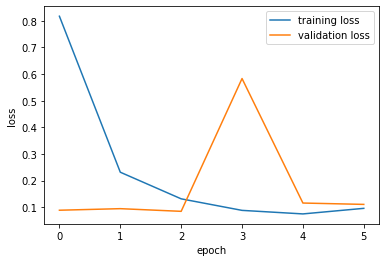

In [42]:
plot_training_loss(training_history_es)

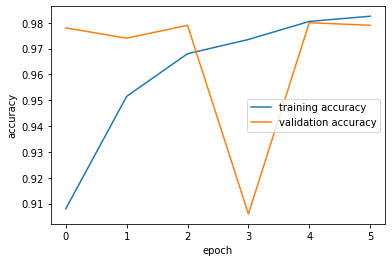

In [43]:
plot_training_accuracy(training_history_es)

## Deeper Model
- Generally adding more Dense layers to your custom modifications will improve the accuracy on training dataset

In [9]:
# To create a model for our needs, first create a blank model
model = Sequential()

# Then add the pre-trained model to use Transfer Learning
model.add(pre_trained_model)

# Finally add our custom modifications
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(len(animal_mappings), activation='softmax'))

# Make the model ready for training
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 15 rounds without Regularization
training_history = model.fit(train_data, epochs=15, validation_data=validation_data)

Epoch 1/15
63/63 [==============================] - 310s 5s/step - loss: 0.5712 - accuracy: 0.9070 - val_loss: 0.2356 - val_accuracy: 0.9330
Epoch 2/15
63/63 [==============================] - 314s 5s/step - loss: 0.1272 - accuracy: 0.9645 - val_loss: 0.3734 - val_accuracy: 0.9140
Epoch 3/15
63/63 [==============================] - 298s 5s/step - loss: 0.0975 - accuracy: 0.9700 - val_loss: 0.0839 - val_accuracy: 0.9780
Epoch 4/15
63/63 [==============================] - 298s 5s/step - loss: 0.0572 - accuracy: 0.9850 - val_loss: 0.2139 - val_accuracy: 0.9560
Epoch 5/15
63/63 [==============================] - 296s 5s/step - loss: 0.0518 - accuracy: 0.9815 - val_loss: 0.2315 - val_accuracy: 0.9480
Epoch 6/15
63/63 [==============================] - 296s 5s/step - loss: 0.0500 - accuracy: 0.9890 - val_loss: 0.2117 - val_accuracy: 0.9670
Epoch 7/15
63/63 [==============================] - 297s 5s/step - loss: 0.0317 - accuracy: 0.9920 - val_loss: 0.1316 - val_accuracy: 0.9780
Epoch 8/15
63

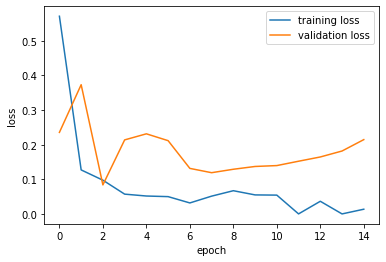

In [15]:
# Plot the training loss without Regularization
plot_training_loss(training_history)

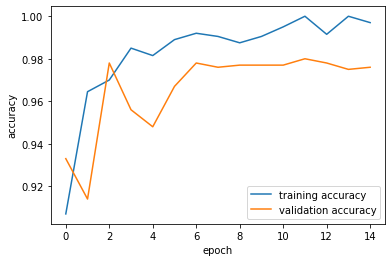

In [28]:
# Plot the training accuracy without Regularization
plot_training_accuracy(training_history)

## Regularization
- When the training loss continues to decrease below the validation loss while the validation loss either stays constant or increases, the model is overfitting (memorizing).
- Regularization techniques are used to improve overfitting.

In [8]:
# Import the necessary packages
from tensorflow.keras.regularizers import L1, L2, L1L2

### Model with L1 Regularization

In [10]:
# To create a model for our needs, first create a blank model
model = Sequential()

# Then add the pre-trained model to use Transfer Learning
model.add(pre_trained_model)

# Finally add our custom modifications
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu', kernel_regularizer=L1(0.001)))
model.add(Dense(len(animal_mappings), activation='softmax'))

# Make the model ready for training
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 15 rounds with L1 Regularization
training_history_l1 = model.fit(train_data, epochs=15, validation_data=validation_data)

Epoch 1/15
63/63 [==============================] - 296s 5s/step - loss: 16.9494 - accuracy: 0.9025 - val_loss: 4.1083 - val_accuracy: 0.9510
Epoch 2/15
63/63 [==============================] - 294s 5s/step - loss: 2.8239 - accuracy: 0.9290 - val_loss: 1.7552 - val_accuracy: 0.9800
Epoch 3/15
63/63 [==============================] - 294s 5s/step - loss: 1.7481 - accuracy: 0.9305 - val_loss: 1.3780 - val_accuracy: 0.9800
Epoch 4/15
63/63 [==============================] - 294s 5s/step - loss: 1.3977 - accuracy: 0.9545 - val_loss: 1.5098 - val_accuracy: 0.9210
Epoch 5/15
63/63 [==============================] - 294s 5s/step - loss: 1.3243 - accuracy: 0.9585 - val_loss: 1.2533 - val_accuracy: 0.9670
Epoch 6/15
63/63 [==============================] - 294s 5s/step - loss: 1.2595 - accuracy: 0.9615 - val_loss: 1.7839 - val_accuracy: 0.8100
Epoch 7/15
63/63 [==============================] - 294s 5s/step - loss: 1.2208 - accuracy: 0.9715 - val_loss: 1.3842 - val_accuracy: 0.9080
Epoch 8/15
6

(1.0, 2.0)

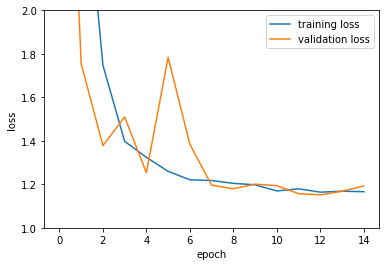

In [21]:
# Plot the training loss with L1 Regularization
plot_training_loss(training_history_l1)
plt.ylim(1,2)

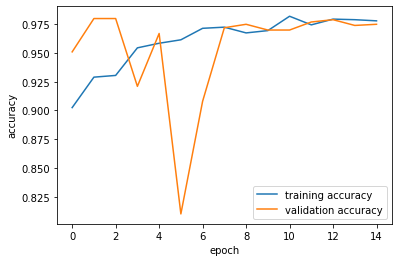

In [29]:
# Plot the training accuracy with L1 Regularization
plot_training_accuracy(training_history_l1)

### Model with L2 Regularization

In [11]:
# To create a model for our needs, first create a blank model
model = Sequential()

# Then add the pre-trained model to use Transfer Learning
model.add(pre_trained_model)

# Finally add our custom modifications
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu', kernel_regularizer=L2(0.001)))
model.add(Dense(len(animal_mappings), activation='softmax'))

# Make the model ready for training
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 15 rounds with L2 Regularization
training_history_l2 = model.fit(train_data, epochs=15, validation_data=validation_data)

Epoch 1/15
63/63 [==============================] - 296s 5s/step - loss: 1.7574 - accuracy: 0.8960 - val_loss: 0.7845 - val_accuracy: 0.9600
Epoch 2/15
63/63 [==============================] - 294s 5s/step - loss: 0.6425 - accuracy: 0.9530 - val_loss: 0.5197 - val_accuracy: 0.9620
Epoch 3/15
63/63 [==============================] - 294s 5s/step - loss: 0.5079 - accuracy: 0.9575 - val_loss: 0.3134 - val_accuracy: 0.9790
Epoch 4/15
63/63 [==============================] - 294s 5s/step - loss: 0.4028 - accuracy: 0.9675 - val_loss: 0.7037 - val_accuracy: 0.9220
Epoch 5/15
63/63 [==============================] - 294s 5s/step - loss: 0.3513 - accuracy: 0.9675 - val_loss: 0.3095 - val_accuracy: 0.9670
Epoch 6/15
63/63 [==============================] - 294s 5s/step - loss: 0.3016 - accuracy: 0.9705 - val_loss: 0.2502 - val_accuracy: 0.9800
Epoch 7/15
63/63 [==============================] - 294s 5s/step - loss: 0.2253 - accuracy: 0.9810 - val_loss: 0.2721 - val_accuracy: 0.9760
Epoch 8/15
63

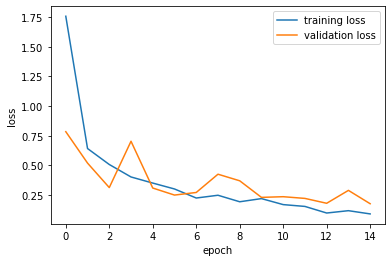

In [17]:
# Plot the training loss with L2 Regularization
plot_training_loss(training_history_l2)

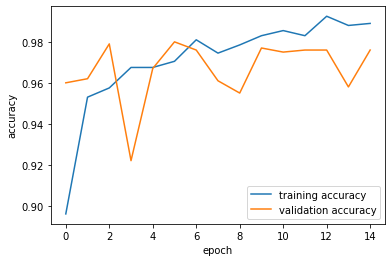

In [30]:
# Plot the training accuracy with L2 Regularization
plot_training_accuracy(training_history_l2)

### Model with L1 and L2 Regularization

In [12]:
# To create a model for our needs, first create a blank model
model = Sequential()

# Then add the pre-trained model to use Transfer Learning
model.add(pre_trained_model)

# Finally add our custom modifications
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu', kernel_regularizer=L1L2(0.001, 0.001)))
model.add(Dense(len(animal_mappings), activation='softmax'))

# Make the model ready for training
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 15 rounds with L1 and L2 Regularization
training_history_l1l2 = model.fit(train_data, epochs=15, validation_data=validation_data)

Epoch 1/15
63/63 [==============================] - 295s 5s/step - loss: 18.3586 - accuracy: 0.9060 - val_loss: 4.5242 - val_accuracy: 0.9550
Epoch 2/15
63/63 [==============================] - 294s 5s/step - loss: 3.0520 - accuracy: 0.9240 - val_loss: 1.9100 - val_accuracy: 0.9670
Epoch 3/15
63/63 [==============================] - 294s 5s/step - loss: 1.8003 - accuracy: 0.9420 - val_loss: 1.4318 - val_accuracy: 0.9760
Epoch 4/15
63/63 [==============================] - 294s 5s/step - loss: 1.4570 - accuracy: 0.9515 - val_loss: 1.3737 - val_accuracy: 0.9770
Epoch 5/15
63/63 [==============================] - 294s 5s/step - loss: 1.3368 - accuracy: 0.9590 - val_loss: 1.2454 - val_accuracy: 0.9820
Epoch 6/15
63/63 [==============================] - 294s 5s/step - loss: 1.2864 - accuracy: 0.9575 - val_loss: 1.2139 - val_accuracy: 0.9800
Epoch 7/15
63/63 [==============================] - 295s 5s/step - loss: 1.2537 - accuracy: 0.9680 - val_loss: 1.2040 - val_accuracy: 0.9820
Epoch 8/15
6

(1.0, 2.0)

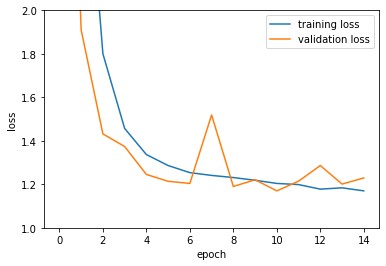

In [23]:
# Plot the training loss with L1 and L2 Regularization
plot_training_loss(training_history_l1l2)
plt.ylim(1,2)

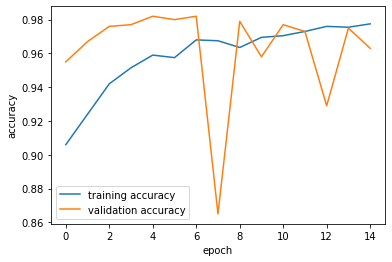

In [31]:
# Plot the training accuracy with L1 and L2 Regularization
plot_training_accuracy(training_history_l1l2)

### Model with Dropout Regularization

In [13]:
# To create a model for our needs, first create a blank model
model = Sequential()

# Then add the pre-trained model to use Transfer Learning
model.add(pre_trained_model)

# Finally add our custom modifications
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(animal_mappings), activation='softmax'))

# Make the model ready for training
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 15 rounds with Dropout Regularization
training_history_dropout = model.fit(train_data, epochs=15, validation_data=validation_data)

Epoch 1/15
63/63 [==============================] - 295s 5s/step - loss: 0.8835 - accuracy: 0.8910 - val_loss: 0.0944 - val_accuracy: 0.9700
Epoch 2/15
63/63 [==============================] - 294s 5s/step - loss: 0.1506 - accuracy: 0.9585 - val_loss: 0.0681 - val_accuracy: 0.9810
Epoch 3/15
63/63 [==============================] - 294s 5s/step - loss: 0.1790 - accuracy: 0.9620 - val_loss: 0.1294 - val_accuracy: 0.9740
Epoch 4/15
63/63 [==============================] - 294s 5s/step - loss: 0.1668 - accuracy: 0.9715 - val_loss: 0.1662 - val_accuracy: 0.9710
Epoch 5/15
63/63 [==============================] - 293s 5s/step - loss: 0.1533 - accuracy: 0.9730 - val_loss: 0.2140 - val_accuracy: 0.9640
Epoch 6/15
63/63 [==============================] - 293s 5s/step - loss: 0.0866 - accuracy: 0.9795 - val_loss: 0.1491 - val_accuracy: 0.9760
Epoch 7/15
63/63 [==============================] - 294s 5s/step - loss: 0.1044 - accuracy: 0.9770 - val_loss: 0.1635 - val_accuracy: 0.9770
Epoch 8/15
63

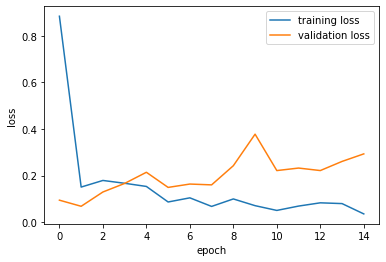

In [19]:
# Plot the training loss with Dropout Regularization
plot_training_loss(training_history_dropout)

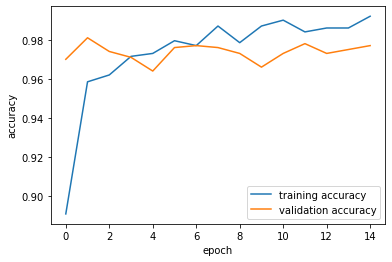

In [32]:
# Plot the training accuracy with Dropout Regularization
plot_training_accuracy(training_history_dropout)

## Conclusion
- In this specific case, all regularization types seem to deliver equivalent results, so we can choose the simplest model for predictions.
- However, in cases where the training accuracy or training loss is much better than the validation accuracy or validation loss, the usage of regularization techniques, can help bring them both closer together in the better direction.
- Hence, if you encounter overfitting in your model, always try out the various regularization techniques as part of your experimentation